In [36]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from keras.saving import load_model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_auc_score, f1_score, accuracy_score

In [43]:
with open('models/random_forest_base.pkl','rb') as f:
    rf_base = pickle.load(f)

with open('models/random_forest_best.pkl','rb') as f:
    rf_best = pickle.load(f)

with open('models/xgb_model_base.pkl','rb') as f:
    xgb_base = pickle.load(f)

with open('models/xgb_model_best.pkl','rb') as f:
    xgb_best = pickle.load(f)

with open('models/X_train.pkl','rb') as f:
    X_train = pickle.load(f)

with open('models/X_test.pkl','rb') as f:
    X_test = pickle.load(f)

with open('models/y_train.pkl','rb') as f:
    y_train = pickle.load(f)

with open('models/y_test.pkl','rb') as f:
    y_test = pickle.load(f)

with open('models/label_encoder.pkl','rb') as f:
    label_encoder = pickle.load(f)

nn_base = load_model('models/NNmodel_base.keras')
nn_best = load_model('models/NNmodel_best.keras')

In [14]:
crimes = pd.read_csv('crimes_data.csv')

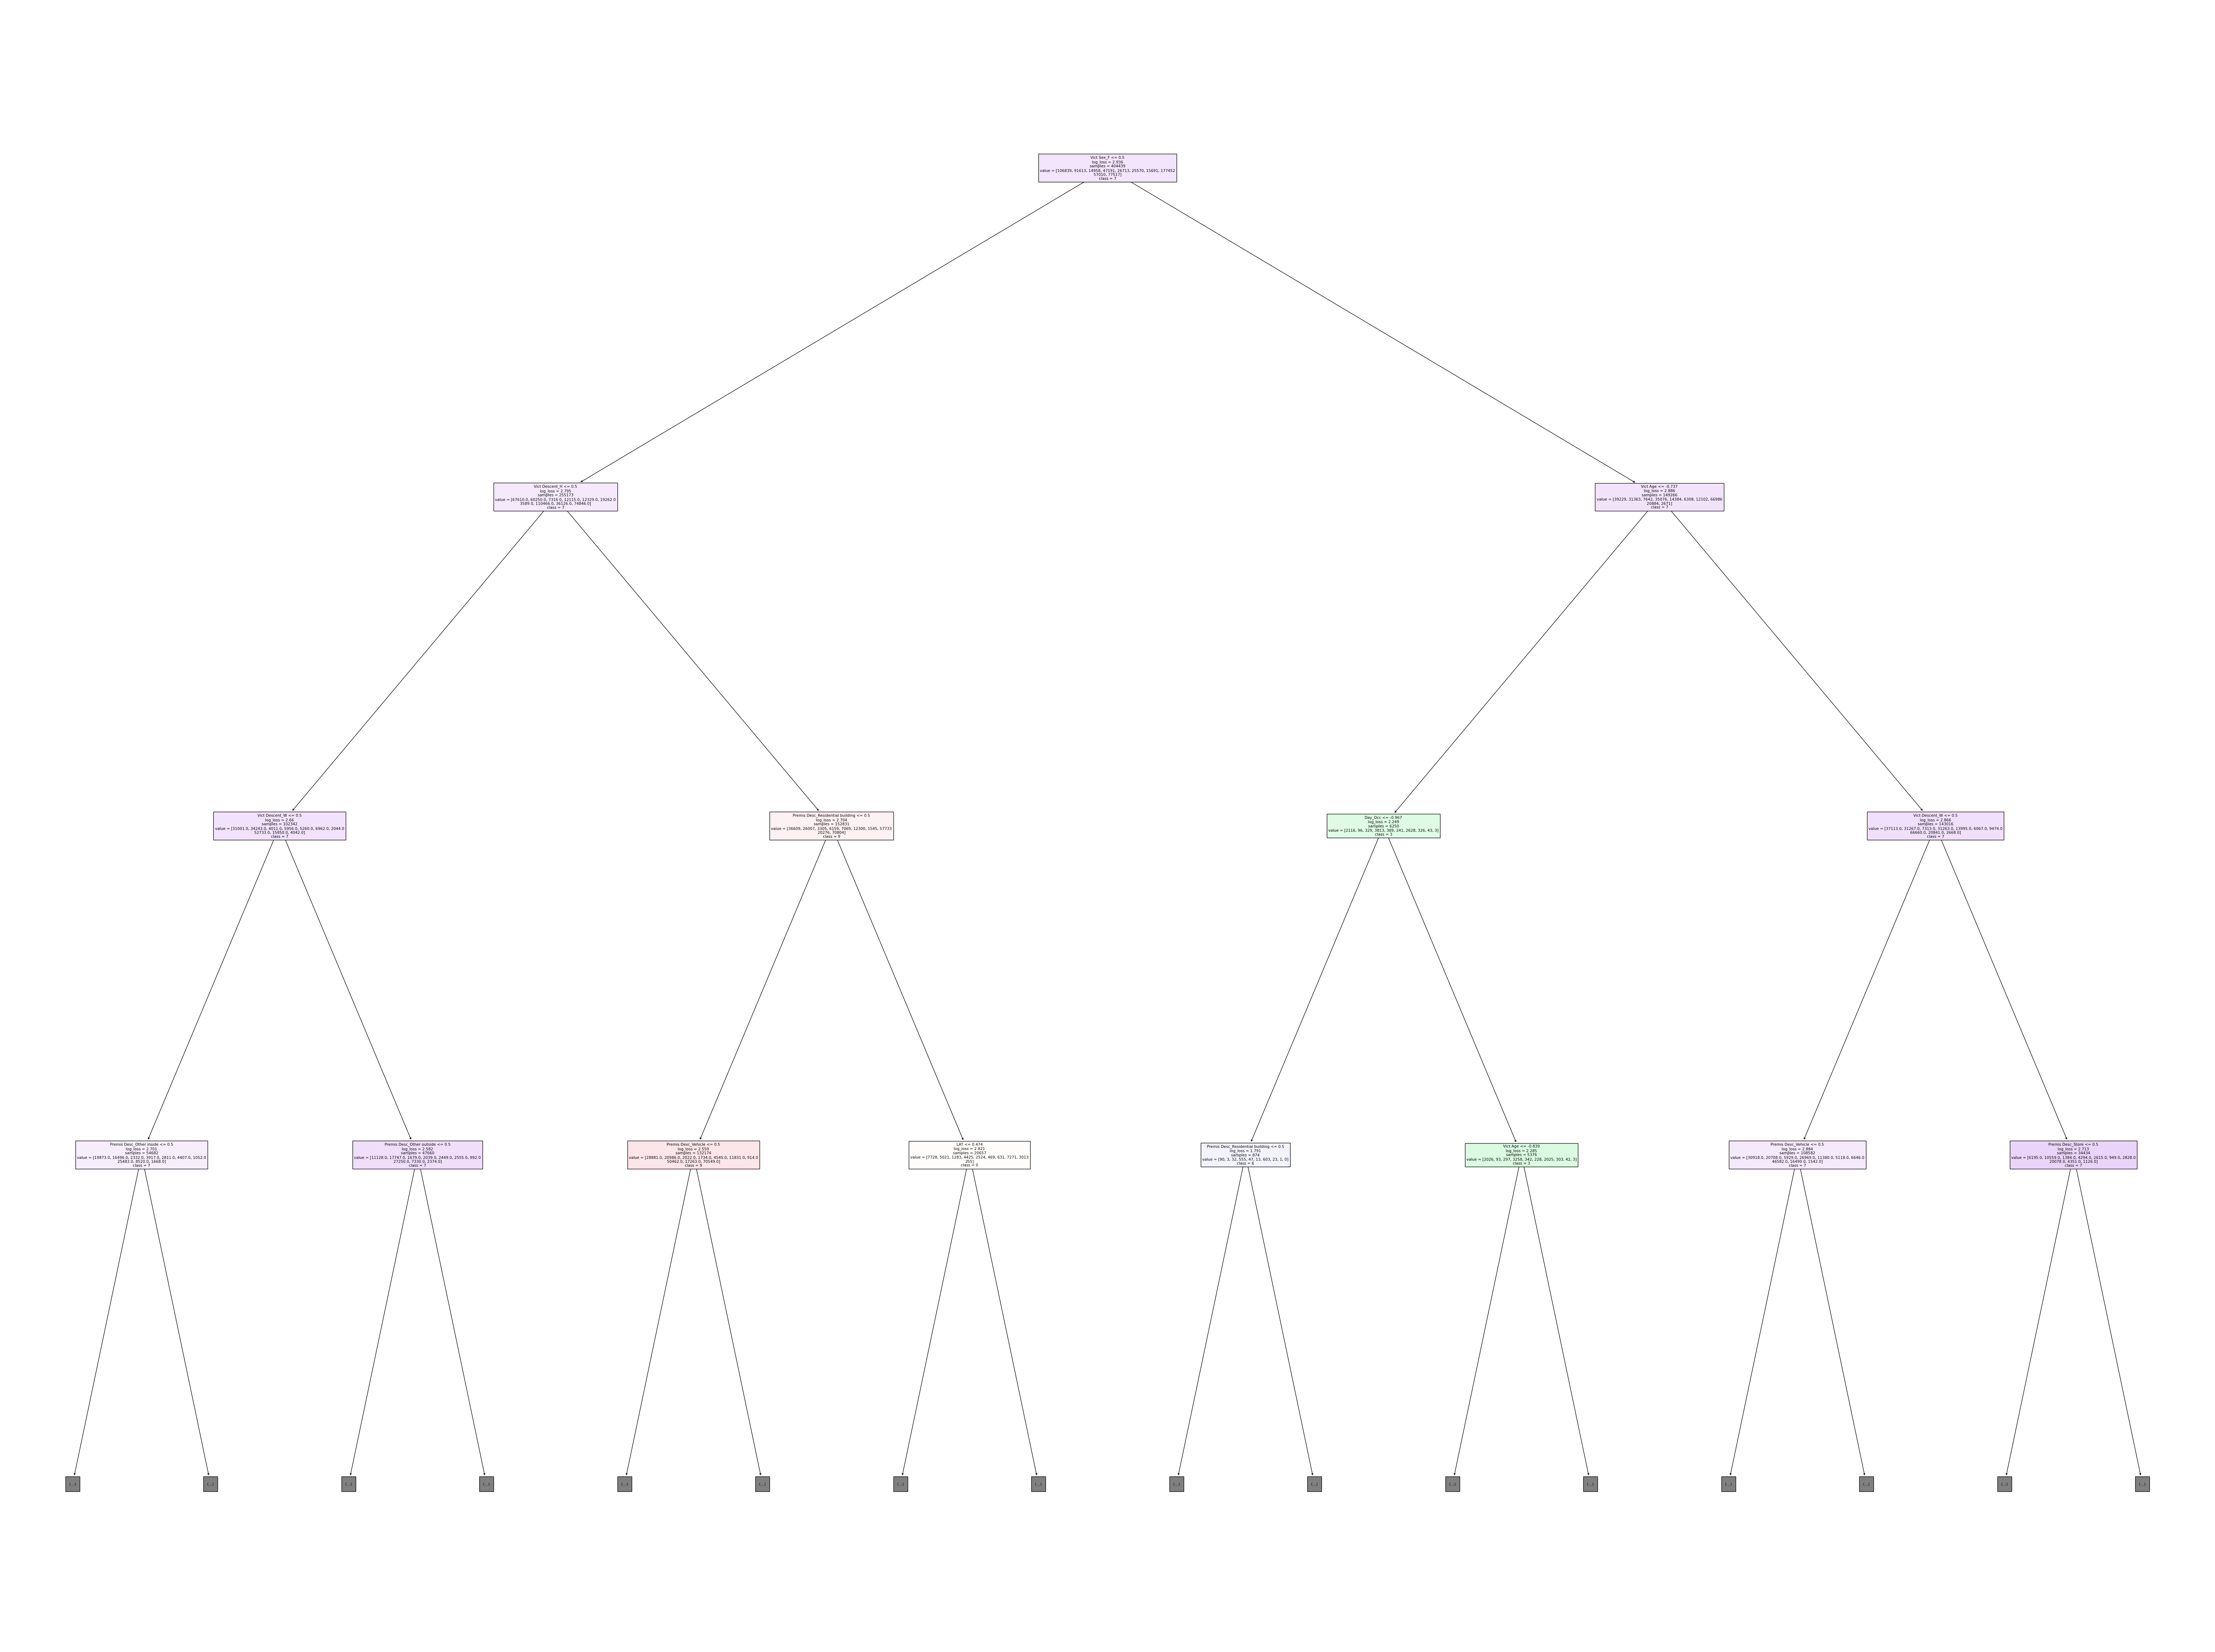

In [29]:
feature_names = X_train.columns
class_names = rf_best.classes_
feature_names = list(map(str, feature_names))
class_names = list(map(str, class_names))

class_names_inversed =[]
for x in class_names:
    class_names_inversed.append(label_encoder.inverse_transform([int(x)])[0])
class_names_inversed

fig = plt.figure(figsize=(80,60))
_ = tree.plot_tree(rf_best.estimators_[0],
                   max_depth=3,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)
fig.savefig("decistion_tree.png")

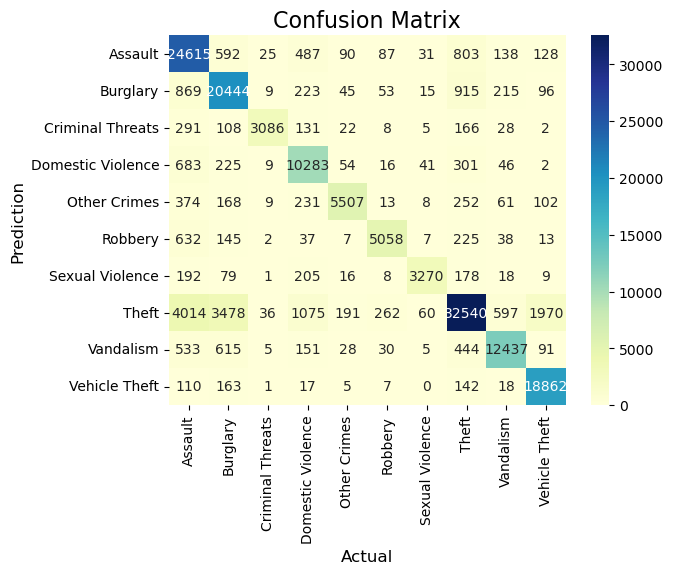

In [44]:
rf_base_pred = rf_base.predict(X_test)
cm = confusion_matrix(y_test, rf_base_pred)
matrix_best = sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu', xticklabels=class_names_inversed, yticklabels=class_names_inversed)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()
fig = matrix_best.get_figure()
fig.savefig('rf_best_matrix.png', bbox_inches='tight')

In [45]:
rf_base_pred_proba = rf_base.predict_proba(X_test)
print(roc_auc_score(y_test, rf_base_pred_proba, multi_class = 'ovo', average = 'macro'))
print(accuracy_score(y_test, rf_base_pred))
print(classification_report(y_test, rf_base_pred))

0.9714921811847081
0.849899150113339
              precision    recall  f1-score   support

           0       0.76      0.91      0.83     26996
           1       0.79      0.89      0.84     22884
           2       0.97      0.80      0.88      3847
           3       0.80      0.88      0.84     11660
           4       0.92      0.82      0.87      6725
           5       0.91      0.82      0.86      6164
           6       0.95      0.82      0.88      3976
           7       0.90      0.74      0.81     44223
           8       0.91      0.87      0.89     14339
           9       0.89      0.98      0.93     19325

    accuracy                           0.85    160139
   macro avg       0.88      0.85      0.86    160139
weighted avg       0.86      0.85      0.85    160139



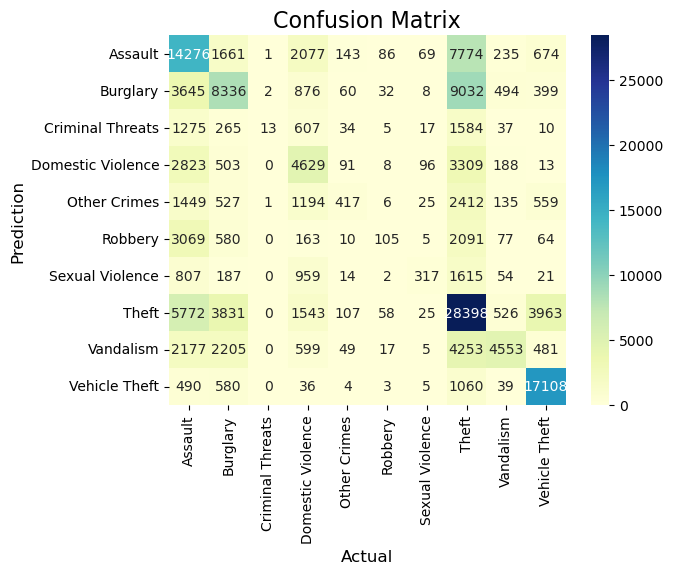

In [46]:
rf_best_pred = rf_best.predict(X_test)
cm = confusion_matrix(y_test, rf_best_pred)
matrix_best = sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu', xticklabels=class_names_inversed, yticklabels=class_names_inversed)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()
fig = matrix_best.get_figure()
fig.savefig('rf_best_matrix.png', bbox_inches='tight')

In [47]:
rf_best_pred_proba = rf_best.predict_proba(X_test)
print(roc_auc_score(y_test, rf_best_pred_proba, multi_class = 'ovo', average = 'macro'))
print(accuracy_score(y_test, rf_best_pred))
print(classification_report(y_test, rf_best_pred))

0.8014186358017612
0.48802602738870604
              precision    recall  f1-score   support

           0       0.40      0.53      0.45     26996
           1       0.45      0.36      0.40     22884
           2       0.76      0.00      0.01      3847
           3       0.36      0.40      0.38     11660
           4       0.45      0.06      0.11      6725
           5       0.33      0.02      0.03      6164
           6       0.55      0.08      0.14      3976
           7       0.46      0.64      0.54     44223
           8       0.72      0.32      0.44     14339
           9       0.73      0.89      0.80     19325

    accuracy                           0.49    160139
   macro avg       0.52      0.33      0.33    160139
weighted avg       0.50      0.49      0.46    160139



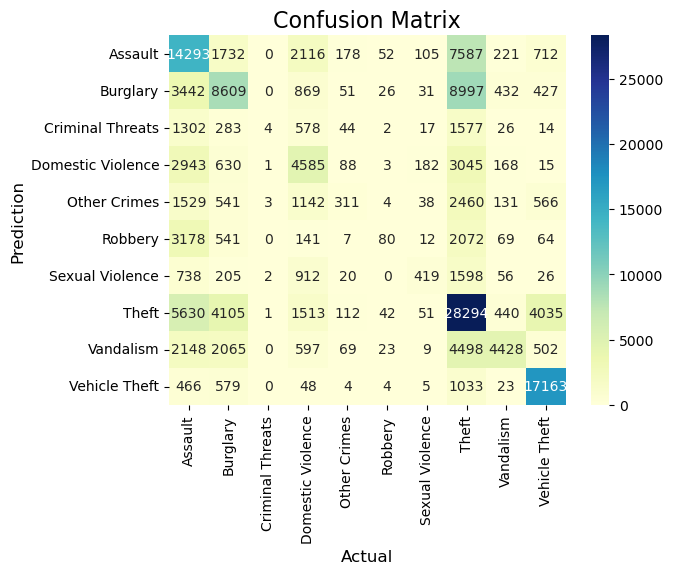

In [48]:
xgb_base_pred = xgb_base.predict(X_test)
cm = confusion_matrix(y_test, xgb_base_pred)
matrix_best = sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu', xticklabels=class_names_inversed, yticklabels=class_names_inversed)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()
fig = matrix_best.get_figure()
fig.savefig('xgb_base_matrix.png', bbox_inches='tight')

In [50]:
xgb_base_pred_proba = xgb_base.predict_proba(X_test)
print(roc_auc_score(y_test, xgb_base_pred_proba, multi_class = 'ovo', average = 'macro'))
print(accuracy_score(y_test, xgb_base_pred))
print(classification_report(y_test, xgb_base_pred))

0.8053326667151808
0.48823834293957125
              precision    recall  f1-score   support

           0       0.40      0.53      0.46     26996
           1       0.45      0.38      0.41     22884
           2       0.36      0.00      0.00      3847
           3       0.37      0.39      0.38     11660
           4       0.35      0.05      0.08      6725
           5       0.34      0.01      0.03      6164
           6       0.48      0.11      0.17      3976
           7       0.46      0.64      0.54     44223
           8       0.74      0.31      0.44     14339
           9       0.73      0.89      0.80     19325

    accuracy                           0.49    160139
   macro avg       0.47      0.33      0.33    160139
weighted avg       0.49      0.49      0.46    160139



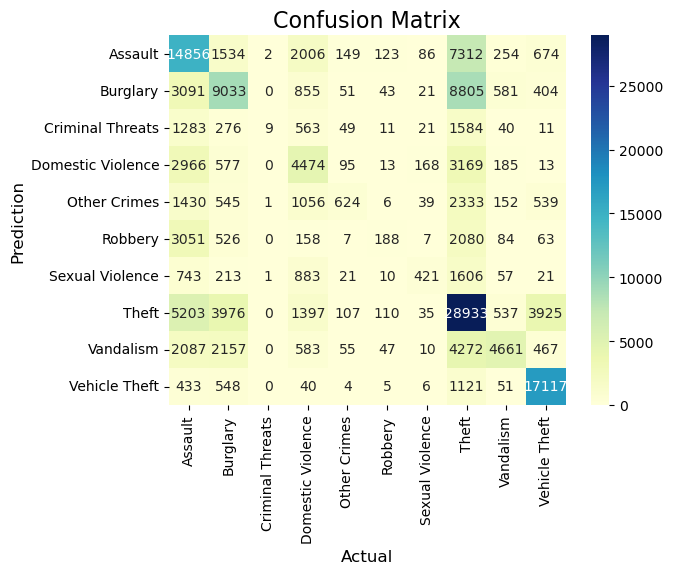

In [51]:
xgb_best_pred = xgb_best.predict(X_test)
cm = confusion_matrix(y_test, xgb_best_pred)
matrix_best = sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu', xticklabels=class_names_inversed, yticklabels=class_names_inversed)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()
fig = matrix_best.get_figure()
fig.savefig('xgb_best_matrix.png', bbox_inches='tight')

In [53]:
xgb_best_pred_proba = xgb_best.predict_proba(X_test)
print(roc_auc_score(y_test, xgb_best_pred_proba, multi_class = 'ovo', average = 'macro'))
print(accuracy_score(y_test, xgb_best_pred))
print(classification_report(y_test, xgb_best_pred))

0.8130840073164679
0.5015392877437725
              precision    recall  f1-score   support

           0       0.42      0.55      0.48     26996
           1       0.47      0.39      0.43     22884
           2       0.69      0.00      0.00      3847
           3       0.37      0.38      0.38     11660
           4       0.54      0.09      0.16      6725
           5       0.34      0.03      0.06      6164
           6       0.52      0.11      0.18      3976
           7       0.47      0.65      0.55     44223
           8       0.71      0.33      0.45     14339
           9       0.74      0.89      0.80     19325

    accuracy                           0.50    160139
   macro avg       0.53      0.34      0.35    160139
weighted avg       0.51      0.50      0.47    160139



In [55]:
yTest = pd.get_dummies(y_test)

5005/5005 ━━━━━━━━━━━━━━━━━━━━ 2s 386us/step


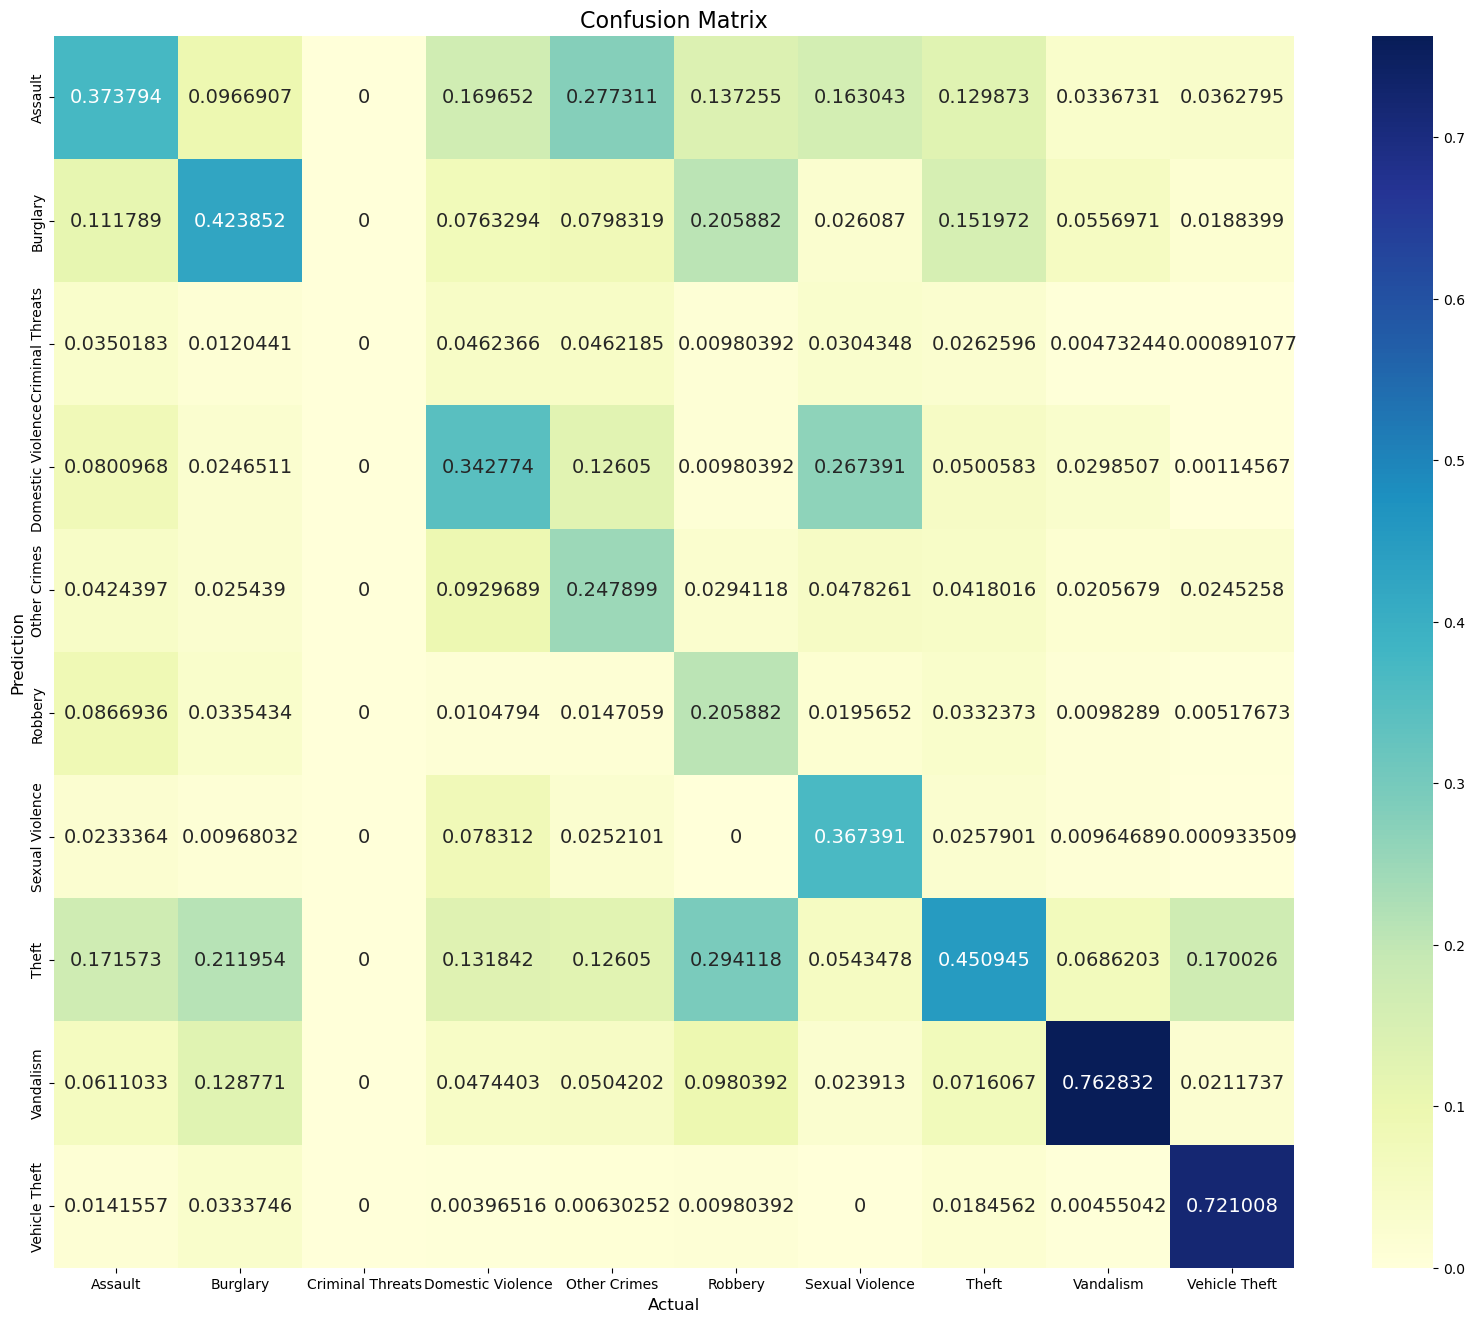

In [56]:
nn_base_pred = nn_base.predict(X_test)


y_pred_classes = np.argmax(nn_base_pred, axis=1)

y_true = np.argmax(yTest, axis=1)

cm = confusion_matrix(y_true, y_pred_classes, normalize='pred')

plt.figure(figsize=(20, 16))
matrix_best = sns.heatmap(cm, annot=True,fmt='g', cmap='YlGnBu', xticklabels=class_names_inversed, yticklabels=class_names_inversed, annot_kws={"size": 14})
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()
fig = matrix_best.get_figure()
fig.savefig('nn_base_matrix.png')

In [57]:
print (roc_auc_score(yTest, nn_base_pred, average = 'macro', multi_class = 'ovo'))

score = nn_base.evaluate(X_test, yTest, verbose = 0) 
print(score)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
print('F1 score:', score[3])

0.8011055667982536
[1.513551115989685, 0.47031641006469727, 0.8658082485198975, <tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.4291462 , 0.3705106 , 0.        , 0.37551868, 0.03277322,
       0.00670284, 0.07619476, 0.5255917 , 0.4226289 , 0.79231554],
      dtype=float32)>]
Test loss: 1.513551115989685
Test accuracy: 0.47031641006469727
F1 score: tf.Tensor(
[0.4291462  0.3705106  0.         0.37551868 0.03277322 0.00670284
 0.07619476 0.5255917  0.4226289  0.79231554], shape=(10,), dtype=float32)


5005/5005 ━━━━━━━━━━━━━━━━━━━━ 2s 450us/step


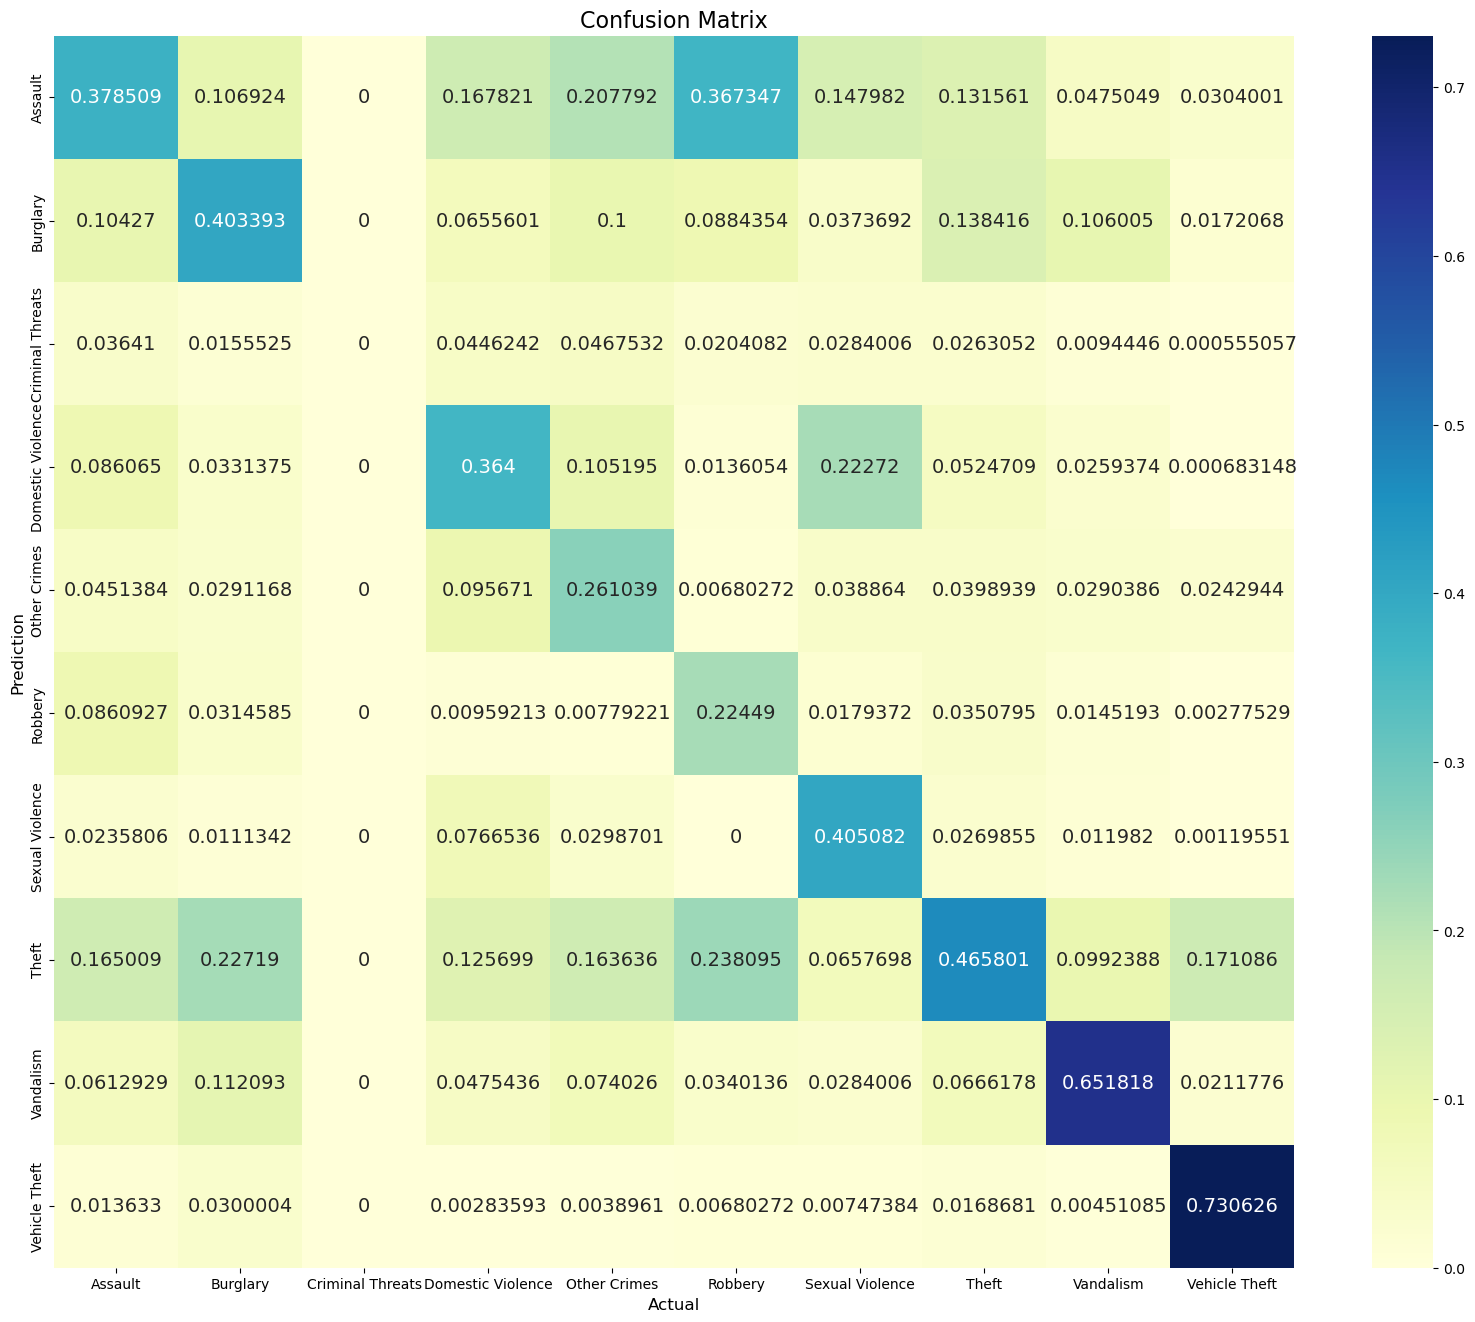

In [58]:
nn_best_pred = nn_best.predict(X_test)

y_pred_classes = np.argmax(nn_best_pred, axis=1)

y_true = np.argmax(yTest, axis=1)

cm = confusion_matrix(y_true, y_pred_classes, normalize='pred')

plt.figure(figsize=(20, 16))
matrix_best = sns.heatmap(cm, annot=True,fmt='g', cmap='YlGnBu', xticklabels=class_names_inversed, yticklabels=class_names_inversed, annot_kws={"size": 14})
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()
fig = matrix_best.get_figure()
fig.savefig('nn_best_matrix.png')

In [60]:
print (roc_auc_score(yTest, nn_best_pred, average = 'macro', multi_class = 'ovo'))

best_score = nn_best.evaluate(X_test, yTest, verbose = 0) 
print(best_score)
print('Test loss:', best_score[0]) 
print('Test accuracy:', best_score[1])
print('F1 score:', best_score[3])

0.8070622233058543
[1.4963256120681763, 0.4751996695995331, 0.8690906763076782, <tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.43306643, 0.40116876, 0.        , 0.36906412, 0.05363574,
       0.01045793, 0.11668459, 0.52590835, 0.43148413, 0.8006176 ],
      dtype=float32)>]
Test loss: 1.4963256120681763
Test accuracy: 0.4751996695995331
F1 score: tf.Tensor(
[0.43306643 0.40116876 0.         0.36906412 0.05363574 0.01045793
 0.11668459 0.52590835 0.43148413 0.8006176 ], shape=(10,), dtype=float32)
